## Bak, Tang, Wiesenfeld (BTW) Sandpile Model

by [Erika Fille T. Legara](www.erikalegara.net)

---
In this notebook, we illustrate how the sandpile model of Bak, Tang, and Wiesenfeld is implemented. We follow closely Per Bak's description of the model in his book titled "How Nature Works". As stated in the book (pp. 52), in the sandpile model, "the table where the sand is dropped is represented by a 2-d grid". In this recipe, we define the grid as $\textbf{M}$, which is an $N \times N$ matrix. Each cell of $\textbf{M}$, which is represented by the coordinates $x$ and $y$, has a value $Z(x,y)$ that ranges from (0,3). This is how we initialize our matrix $\textbf{M}$ below. 

After the initialization, the simulation begins by dropping a grain of sand on the sandpile at some random location $x$ and $y$ such that when a grain is dropped on $\textbf{M}(x,y)$,

\begin{equation}
Z(x,y) \rightarrow Z(x,y) + 1
\end{equation}

This process is repeated $i$ times, which we define in this recipe as `iterations`. In the model, BTW set a critical cell value $Z_{\text{cr}}=3$ such that when that value is reached, the next time a grain is added on a critical cell ($Z(x,y)=3$), 4 grain units from that cell would spill (or topple) over to the neighboring cells. That is, when $Z(x,y) > 3$,

\begin{equation}
Z(x,y) \rightarrow Z(x,y) - 4
\end{equation}

and

\begin{equation}
Z(x \pm 1,y) \rightarrow Z(x \pm 1,y) +1, \,\,Z(x ,y\pm 1) \rightarrow Z(x ,y\pm 1) +1.
\end{equation}

In their model, when the toppling happens at the boundaries, grains of sand will just leave the system. This is implemented in the model by defining a boolean variable we call `withinBounds`. 

**References:**
1. Bak, Per. How Nature Works: The Science of Self-organized Criticality. New York, NY, USA: Copernicus, 1996. Print.
2. P. Bak, C. Tang, and K. Wisenfeld (1987). "Self-Organized Criticality: An Explanation of 1/$f$ Noise," *Physical Review Letters* **59** (4).


### Let's Begin


In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import sys
sys.setrecursionlimit(100000)

%matplotlib inline

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### Setting parameters

The `iterations` correspond to the number of times we drop "sand" on the sandpile, which is represented by an $N \times N$ matrix $\textbf{M}$. We define `threshold` as the cricitcal value of a cell wherein it causes an avalanche. `topple` records the number of times the critical threshold value is reached.

In [2]:
iterations = 100000 # number of iterations
N = 50 # size of matrix

global threshold
threshold = 4 # critical level for toppling to occur

topple = 0
topplesize = []

### Defining functions
We then define two functions: `initializeMatrix()` and `drop()`, which are self-explanatory. Note that the model is restricted to the bounds of the matrix. 

In [3]:
def initializeMatrix(N):
    return np.random.randint(4, size=(N,N))

def drop(M, x, y):
    global topple
    withinBounds = True

    if x < 0  or x > N-1 or y < 0 or y > N-1:
        withinBounds = False
        pass

    if withinBounds:
        M[x,y] = M[x,y] + 1
        if M[x,y] >= threshold:
            M[x,y] = M[x,y] - 4 # reset the cell value and distribute to neighbors
            topple += 1 # count the toppling
            drop(M,x+1,y)
            drop(M,x-1,y)
            drop(M,x,y-1)
            drop(M,x,y+1)

### Initializing sandpile
In the next cell, we initialize our sandpile. We also plot how it looks like.

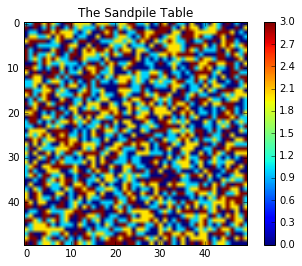

In [4]:
M = initializeMatrix(N)
plt.imshow(M)
plt.colorbar()
plt.title("The Sandpile Table")
plt.show()

### Begin simulation
We then start adding grains of sand, one-by-one, on the sandpile table, choosing a random location every iteration. 

In [5]:
for i in range(iterations):
    topple = 0
    x = random.randint(0, N-1)
    y = random.randint(0, N-1)
    drop(M, x, y)
    topplesize.append(topple)

#print max(topplesize)

### Plot results

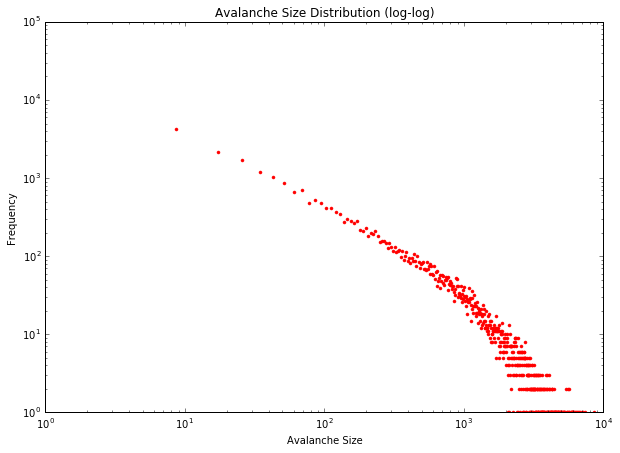

In [6]:
x, y = np.histogram(topplesize, 1000)
plt.figure(figsize=(10,7))
plt.clf()
plt.loglog(y[0:-1],x, 'r.')
plt.title("Avalanche Size Distribution (log-log)")
plt.xlabel("Avalanche Size")
plt.ylabel("Frequency")
plt.show()

The final matrix configuration is shown below.

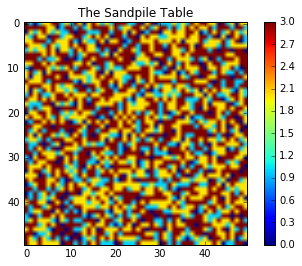

In [7]:
plt.imshow(M)
plt.colorbar()
plt.title("The Sandpile Table")
plt.show()